# Relationship isotropic susceptibility $\chi$ and self-demagnetization

This code shows the relationship between the isotropic susceptibility $\chi$ and the self-demagnetization for triaxial ellipsoids as a function of the ratio $\frac{a - b}{b - c}$.

### Import the required modules

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import get_cmap
from fatiando import mesher, utils
from fatiando.gravmag import triaxial_ellipsoid

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Local-geomagnetic field

In [16]:
F = 20000. + 40000.*np.random.rand()
inc = -90 + 180*np.random.rand()
dec = 360*np.random.rand()

### Triaxial ellipsoid

In [17]:
a = 1000.*np.random.rand()
b = a*np.random.rand()
c = b*np.random.rand()

strike = 360*np.random.rand()
dip = 90*np.random.rand()
rake = 90*np.random.rand()

alpha, gamma, delta = triaxial_ellipsoid.structural_angles(strike, dip, rake)
V = triaxial_ellipsoid.V(alpha, gamma, delta)
n11, n22, n33 = triaxial_ellipsoid.demag_factors(a, b, c)

strike_k = 360*np.random.rand()
dip_k = 90*np.random.rand()
rake_k = 90*np.random.rand()

alpha_k, gamma_k, delta_k = triaxial_ellipsoid.structural_angles(strike_k, dip_k, rake_k)
V_k = triaxial_ellipsoid.V(alpha_k, gamma_k, delta_k)

In [18]:
# Isostropic susceptibility $\chi$ (in SI)
k = np.linspace(0.001, 0.4, 50)

# Relative error
error = []

for ki in k:
    
    # susceptibility tensor
    K = triaxial_ellipsoid.K(ki, ki, ki, 
                             alpha_k, gamma_k, delta_k)
    # magnetization in the local system
    true_mag = triaxial_ellipsoid.magnetization(n11, n22, n33, K, F, inc, dec, 0., 0., 0., V)
    # magnetization in the main system
    true_mag = np.dot(V, true_mag)
    # magnetization norm
    true_mag_norm = np.linalg.norm(true_mag, ord = 2)
    
    # Approximated magnetization
    approx_mag = ki*(F/(4*np.pi*100))*utils.ang2vec(1., inc, dec)
    
    # delta magnetization
    delta_mag_norm = np.linalg.norm(true_mag - approx_mag, ord = 2)

    # Relative error
    error.append(delta_mag_norm/true_mag_norm)

In [19]:
error_bound = 0.1
#chi_limit = error_bound/(n33*(1 - error_bound))
chi_limit = error_bound/n33

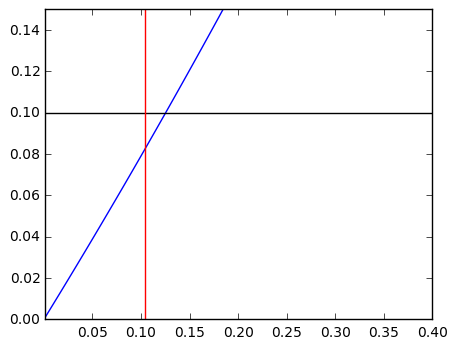

In [20]:
plt.figure(figsize=(5,4))
plt.plot(k, error, '-b')
plt.plot([k.min(), k.max()], [error_bound, error_bound], '-k')
plt.plot([chi_limit, chi_limit], [0., 10.], '-r')
plt.xlim(k.min(), k.max())
plt.ylim(0., 0.15)
plt.show()

In [21]:
# susceptibility tensor
K = triaxial_ellipsoid.K(chi_limit, chi_limit, chi_limit, 
                         alpha_k, gamma_k, delta_k)
# magnetization in the local system
true_mag = triaxial_ellipsoid.magnetization(n11, n22, n33, K, F, inc, dec, 0., 0., 0., V)
# magnetization in the main system
true_mag = np.dot(V, true_mag)
# magnetization norm
true_mag_norm = np.linalg.norm(true_mag, ord = 2)

# Approximated magnetization
approx_mag = chi_limit*(F/(4*np.pi*100))*utils.ang2vec(1., inc, dec)

# delta magnetization
delta_mag_norm = np.linalg.norm(true_mag - approx_mag, ord = 2)

# Relative error
error_theoretical = delta_mag_norm/true_mag_norm

In [22]:
np.alltrue(error_theoretical < error_bound)

True